# Machine Learning Algorithms on Bank DataSet 

## About Dataset 

### Context 

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### Content

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. 

### Detailed Column Descriptions 

<ul>
<li>age: (numeric)</li>
<li>job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"))</li>
<li>marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
<li>education:(categorical: "unknown","secondary","primary","tertiary")</li>
<li>default: has credit in default? (binary: "yes","no")</li>
<li>balance: average yearly balance, in euros (numeric)</li>
<li>housing: has housing loan? (binary: "yes","no")</li>
<li>loan: has personal loan? (binary: "yes","no")</li>
<li>contact: contact communication type (categorical: "unknown","telephone","cellular")</li>
<li>day: last contact day of the month (numeric)</li>
<li>month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")</li>
<li>duration: last contact duration, in seconds (numeric)</li>
<li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric)</li>
<li> poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
</ul>

### Output variable (desired target): 

y: has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv', sep=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
np.shape(df)

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Variables:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


age
Skew : 0.68


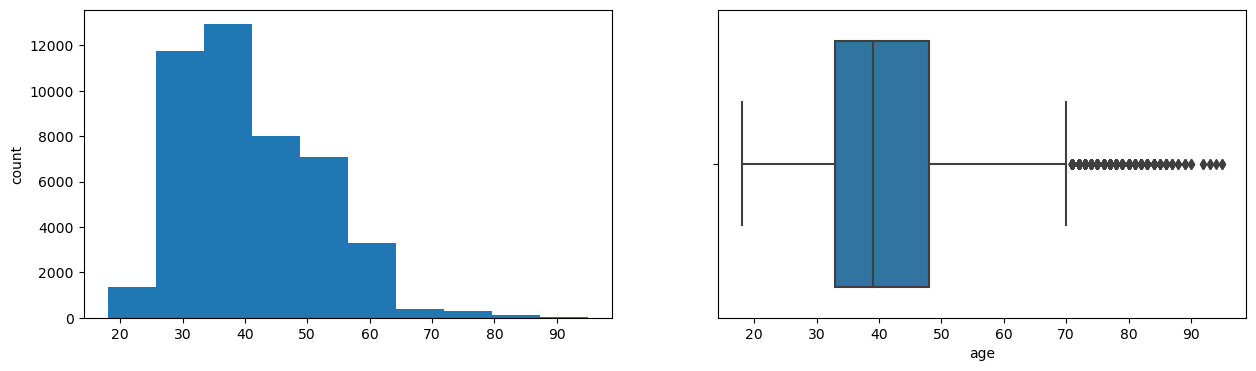

balance
Skew : 8.36


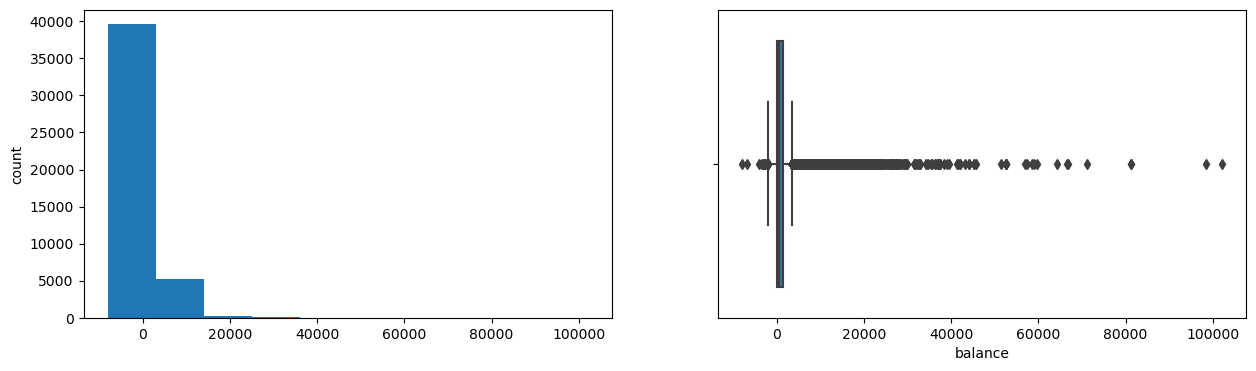

day
Skew : 0.09


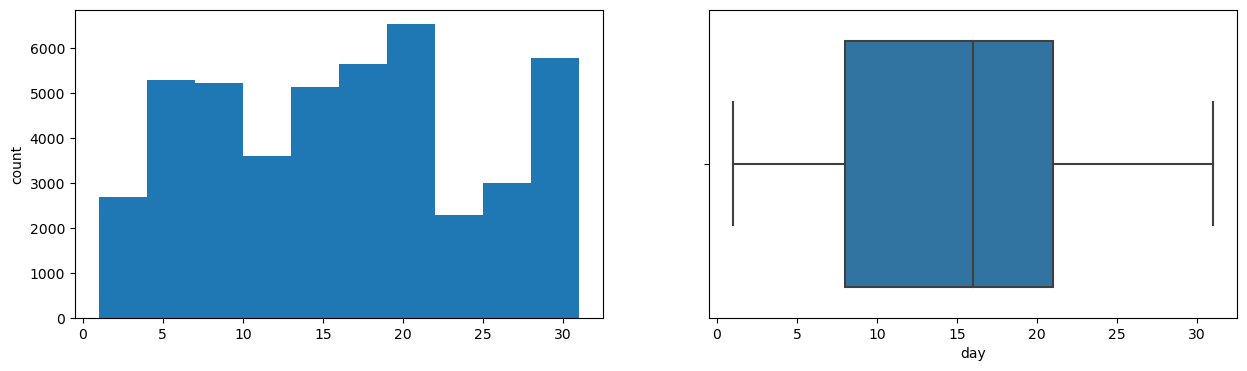

duration
Skew : 3.14


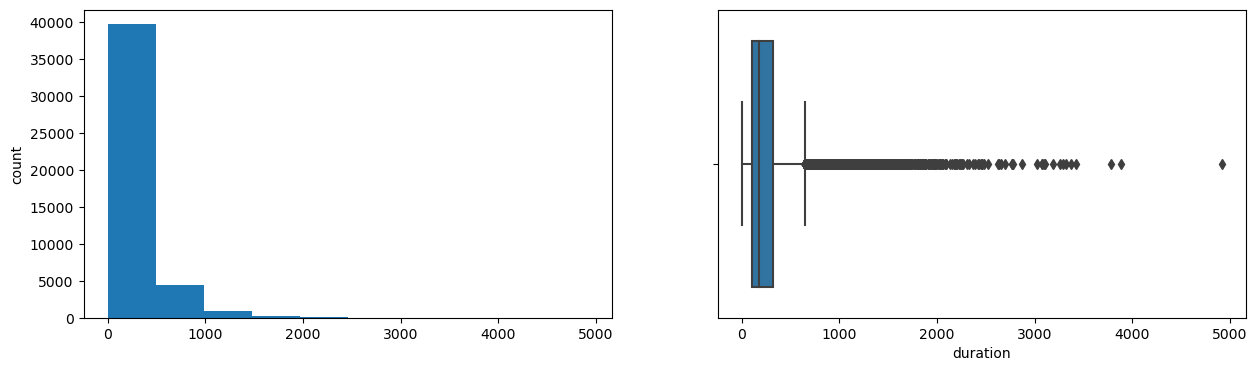

campaign
Skew : 4.9


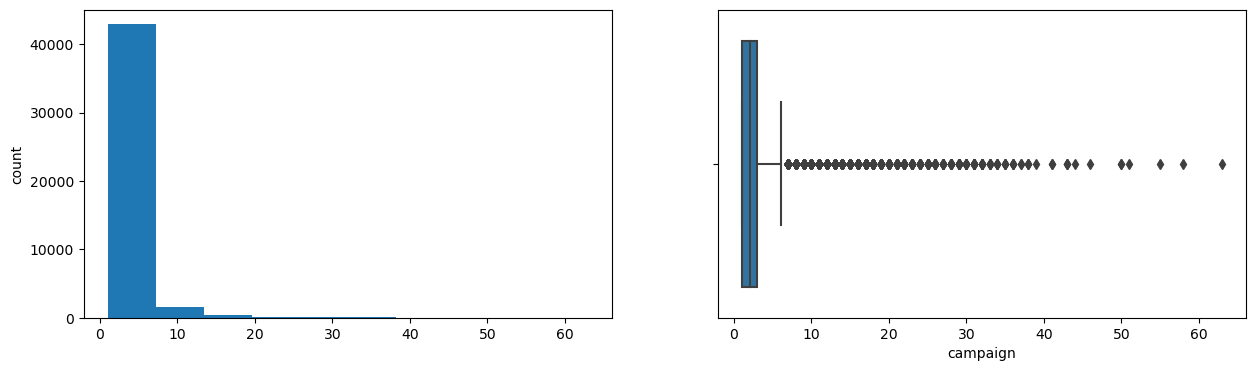

pdays
Skew : 2.62


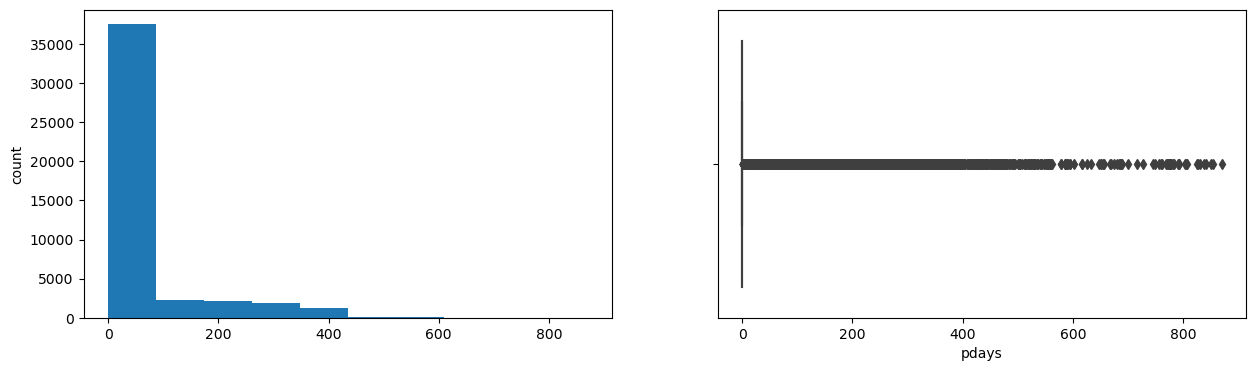

previous
Skew : 41.85


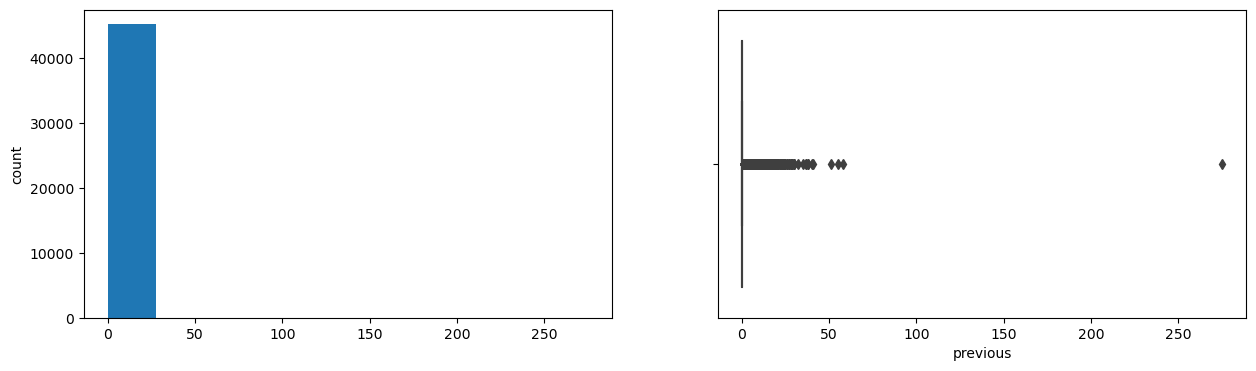

In [7]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe(include="int64").T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [14]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range

In [15]:
print(len(df[['balance', 'duration']].apply(lambda x: x[x < 1000]).dropna()) / len(df) * 100, "%")

66.15425449558737 %


In [16]:
print(len(df[['age']].apply(lambda x: x[x > 18]).dropna()) / len(df) * 100, "%")

99.9734577868218 %


In [17]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [20]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [22]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [23]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [24]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [26]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [27]:
df["y"].value_counts(normalize = True) * 100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [28]:
df.sort_values(by = "balance", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [29]:
df.sort_values(by = "age", ascending = True).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42954,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
41273,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
42146,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
43637,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
40736,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no


In [30]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [31]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
pd.crosstab(df["marital"], df["education"], normalize = 'index')

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,0.144421,0.540618,0.282504,0.032456
married,0.192768,0.505990,0.258617,0.042625
single,0.066693,0.517357,0.374668,0.041282


In [34]:
pd.crosstab(df["job"], df["poutcome"], normalize = 'index')

poutcome,failure,other,success,unknown
job,,,,
admin.,0.124347,0.046606,0.039451,0.789596
blue-collar,0.109741,0.041204,0.015208,0.833847
entrepreneur,0.110289,0.026227,0.014795,0.848689
housemaid,0.078226,0.020968,0.023387,0.877419
management,0.110383,0.041552,0.040918,0.807147
retired,0.101590,0.036661,0.076855,0.784894
self-employed,0.104497,0.038632,0.034832,0.822039
services,0.106885,0.042610,0.020462,0.830043
student,0.124733,0.086354,0.092751,0.696162


In [35]:
df.pivot_table(
    ["age", "balance", "duration"],
    ["job"],
    aggfunc = ["mean", "count"],
)

mean                          count                 
                     age      balance    duration   age balance duration
job                                                                     
admin.         39.289886  1135.838909  246.896732  5171    5171     5171
blue-collar    40.044081  1078.826654  262.901562  9732    9732     9732
entrepreneur   42.190989  1521.470074  256.309348  1487    1487     1487
housemaid      46.415323  1392.395161  245.825000  1240    1240     1240
management     40.449567  1763.616832  253.995771  9458    9458     9458
retired        61.626767  1984.215106  287.361307  2264    2264     2264
self-employed  40.484484  1647.970868  268.157061  1579    1579     1579
services       38.740250   997.088108  259.318729  4154    4154     4154
student        26.542644  1388.060768  246.656716   938     938      938
technician     39.314598  1252.632092  252.904962  7597    7597     7597
unemployed     40.961627  1521.745971  288.543361  1303    1303     1303
unknown        47.593750  1772.357639  237.611111   288     288      288

<Axes: >

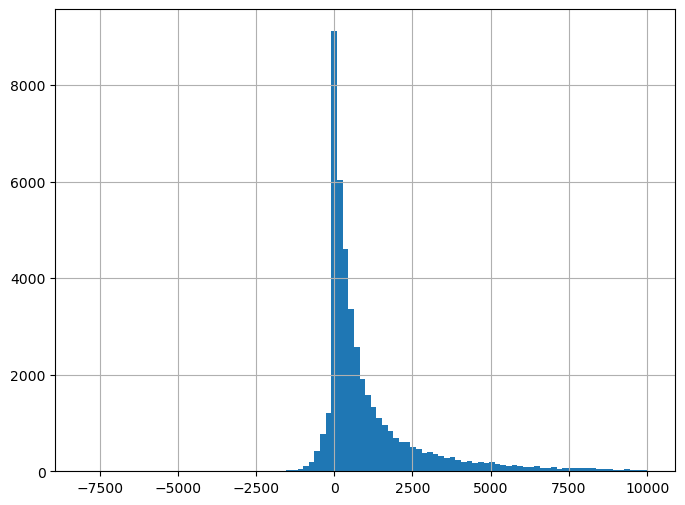

In [40]:
df['balance'][df['balance'] < 10000].hist(bins=100)

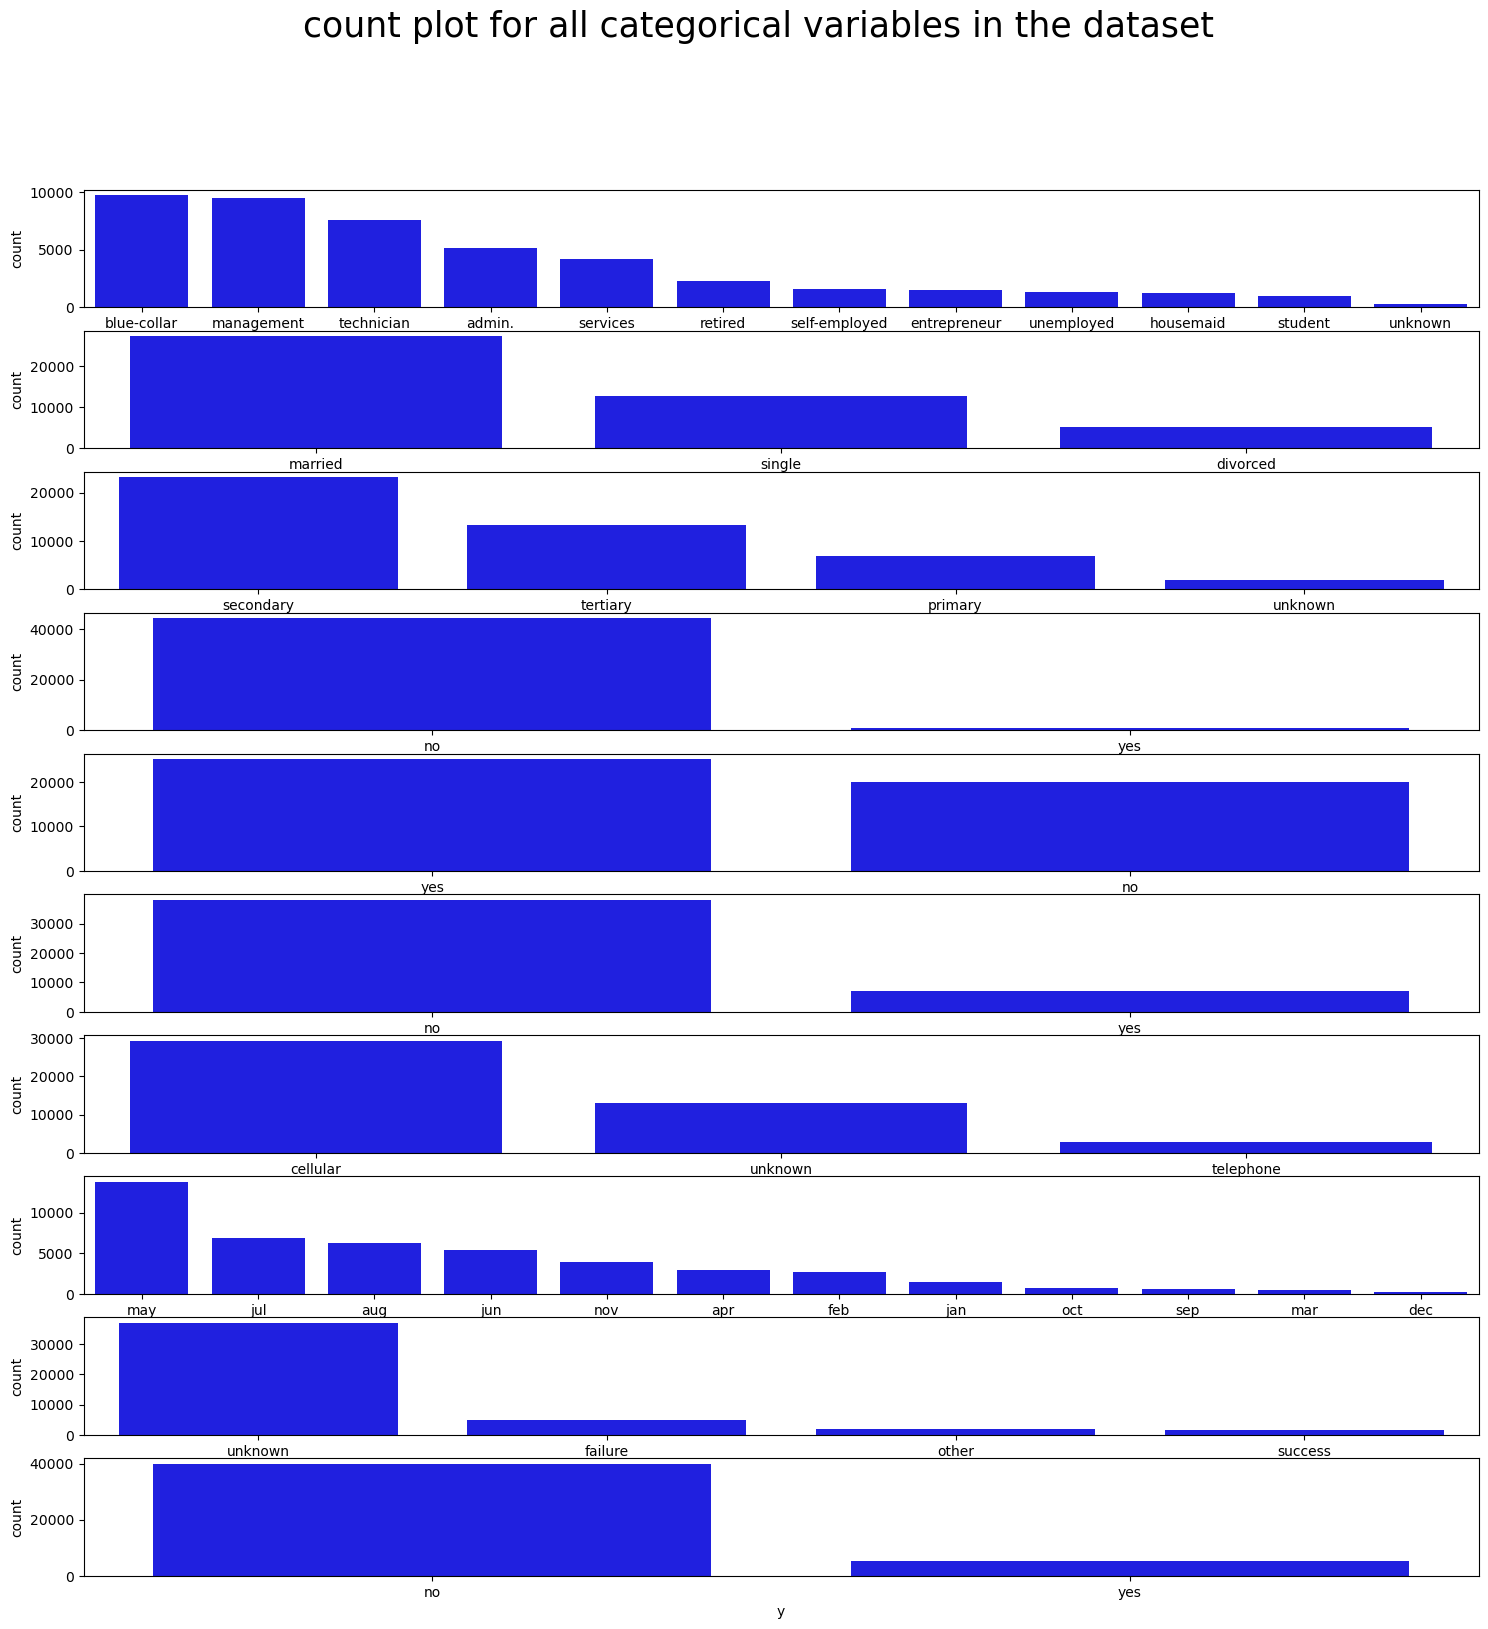

In [45]:
fig, axes = plt.subplots(10, 1, figsize = (18, 18))
fig.suptitle('count plot for all categorical variables in the dataset', fontsize=25)
sns.countplot(ax = axes[0], x = 'job', data = df, color = 'blue', 
              order = df['job'].value_counts().index);
sns.countplot(ax = axes[1], x = 'marital', data = df, color = 'blue', 
              order = df['marital'].value_counts().index);
sns.countplot(ax = axes[2], x = 'education', data = df, color = 'blue', 
              order = df['education'].value_counts().index);
sns.countplot(ax = axes[3], x = 'default', data = df, color = 'blue', 
              order = df['default'].value_counts().index);
sns.countplot(ax = axes[4], x = 'housing', data = df, color = 'blue', 
              order = df['housing'].value_counts().index);
sns.countplot(ax = axes[5], x = 'loan', data = df, color = 'blue', 
              order = df['loan'].value_counts().index);
sns.countplot(ax = axes[6], x = 'contact', data = df, color = 'blue', 
              order = df['contact'].value_counts().index);
sns.countplot(ax = axes[7], x = 'month', data = df, color = 'blue', 
              order = df['month'].value_counts().index);
sns.countplot(ax = axes[8], x = 'poutcome', data = df, color = 'blue', 
              order = df['poutcome'].value_counts().index);
sns.countplot(ax = axes[9], x = 'y', data = df, color = 'blue', 
              order = df['y'].value_counts().index);

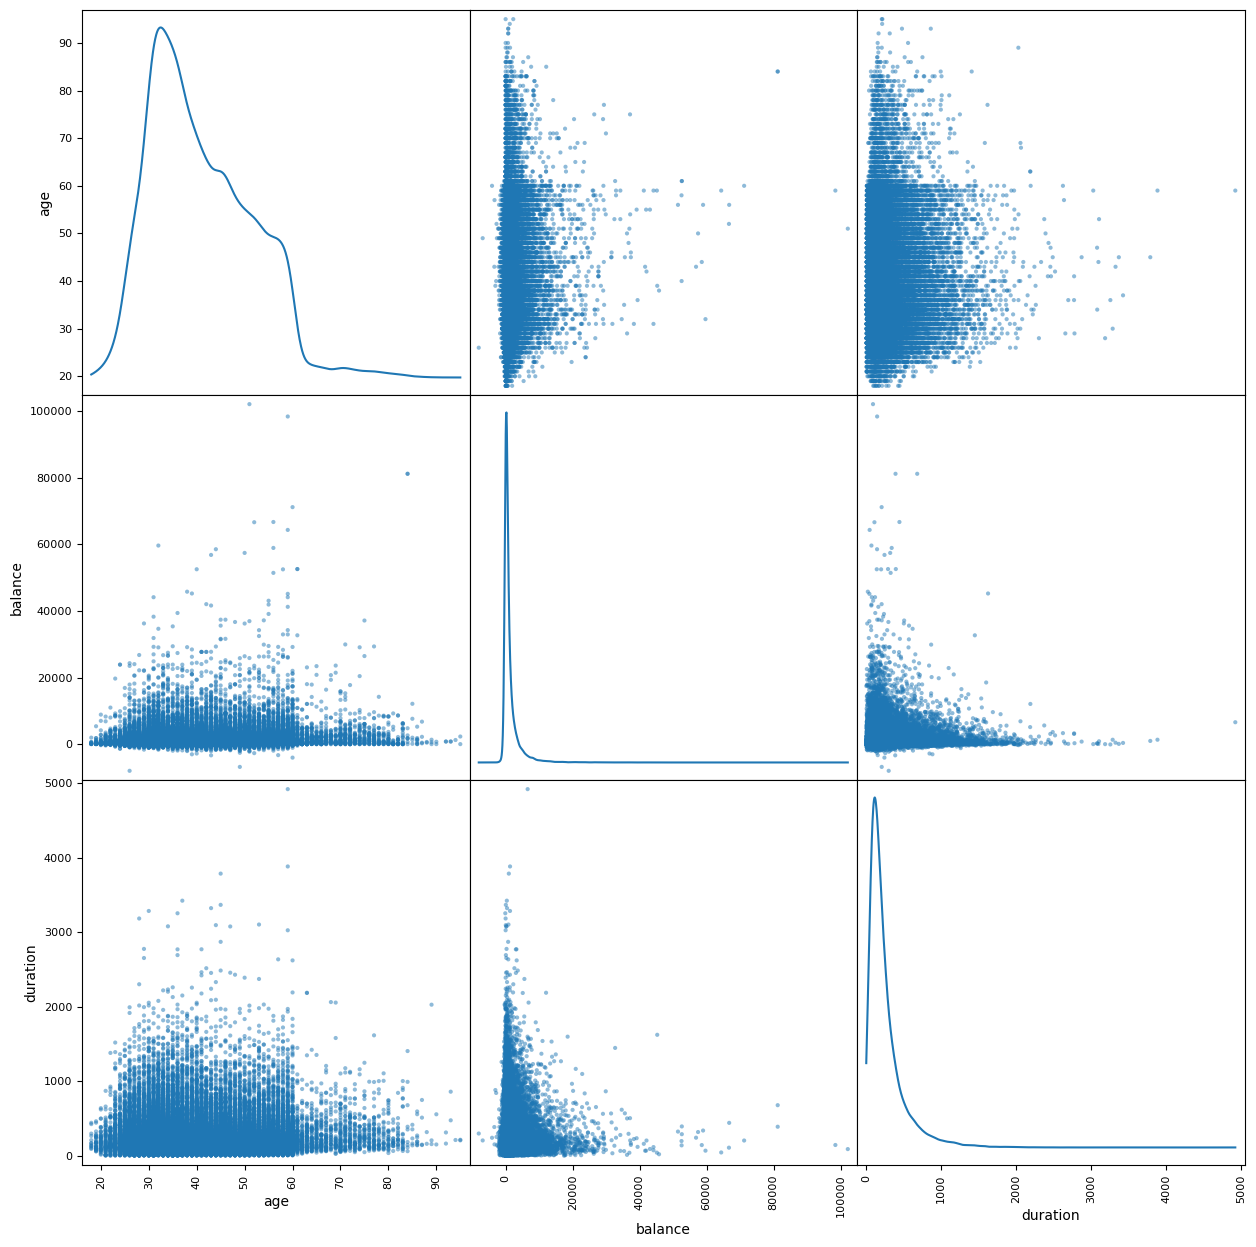

In [46]:
pd.plotting.scatter_matrix(
    df[["age", "balance", "duration"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

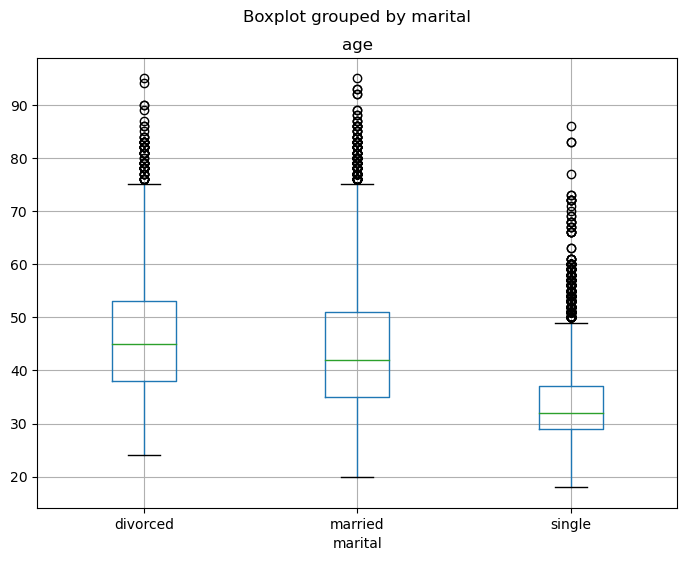

In [47]:
df.boxplot(column = "age",
           by = "marital")
plt.show()